<a href="https://colab.research.google.com/github/PiotrMaciejKowalski/kurs-analiza-danych-2022/blob/main/Tydzie%C5%84%202/Cz%C4%99%C5%9B%C4%87%C2%A06_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kaggle setup

Zaczniemy od przystosowania kaggle do naszego środowiska colaba.

Za pomocą `!` możemy wywoływać polecenia nadrzędnej względem pythona powłoki. Jest nią linuksowy `bash`.


In [1]:
!pip install kaggle

In [2]:
!mkdir ~/.kaggle

Za pomocą komendy echo możemy przekierować zawartość pobranego pliku kaggle.json do właściwego pliku w strukturze katalogów. Potem dla bezpieczeństwa usuwamy nadmiarowe uprawnienia do tego pliku.

In [3]:
!touch ~/.kaggle/kaggle.json
#!echo '{"username":"XX","key":"XX"}' > ~/.kaggle/kaggle.json

In [4]:
!chmod 600 ~/.kaggle/kaggle.json

# Pobranie danych z zawodów house-prices-advanced-regression-techniques

Nasze podstawowe ćwiczenia dotyczyć będą danych do przewidywania cen domów.

In [7]:
!kaggle competitions download -c house-prices-advanced-regression-techniques

  0% 0.00/199k [00:00<?, ?B/s]
100% 199k/199k [00:00<00:00, 64.9MB/s]


In [9]:
!unzip house-prices-advanced-regression-techniques.zip
!ls

Archive:  house-prices-advanced-regression-techniques.zip
  inflating: data_description.txt    
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               
data_description.txt				 sample_submission.csv
house-prices-advanced-regression-techniques.zip  test.csv
sample_data					 train.csv


## Wczytanie danych

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
path='./train.csv'
original_data = pd.read_csv(path)
original_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Zachowamy sobie początkowy stan naszych danych, a pracować będziemy na kopii

In [19]:
data = original_data

# 1. Data cleaning

Określa działania mające na celu usunięcie niezgodności z stanem faktycznym w naszych danych

##Błędy wprowadzone do dataset przez nieuważne wczytywanie

Część danych otrzymany na skutek naszego wczytywania, może być błędna gdyż niesłusznie zostały automatycznie wprowadzone pewne techniki. Np. rozpoznawanie typu danych. Przyjrzyjmy się np kolumnie `MSSubClass`

In [20]:
data['MSSubClass'].dtypes

dtype('int64')

Czy jednak dane tam składowane faktycznie są liczbami (zmiennymi liczbowymi). Porównajmy z wiedzą zawartą w pliku opisującym nasze dane (plik z metadanymi)

In [16]:
!cat data_description.txt

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

Widzimy zatem, że zgodnie z opisem z pliku
```
MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
```
liczby znajdujące się w kolumnach są jedynie kodami pewnych grup. W szczególności oznacza to, że porządki oparte o te liczby czy zależności arytmetyczne - wyuczone przez nas model - nie mają żadnego podparcia danymi.

Wykonajmy właściwą konwersję typu

In [21]:
data['MSSubClass'] = data['MSSubClass'].astype(str)
data['MSSubClass'].dtypes

dtype('O')

## Ćwiczenie 1

Obejrzyjmy kolumnę 
```
OverallQual: Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor
```
Czy powinniśmy przeprowadzić rzutowanie typów?

## Ćwiczenie 2

A czy dla tej kolumny należy przeprowadzić konwersję typów?

```
PoolQC: Pool quality
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool
```

## Uzupełnianie wartości brakujących (FillNA)

Jako efekt pewnych problemów w danych możemy otrzymać kolumny w których brakuje wartości.

Przyjrzyjmy się o które kolumny np. chodzi

In [38]:
nulls = data.isnull().sum().to_frame()
nulls[0].to_dict()

{'1stFlrSF': 0,
 '2ndFlrSF': 0,
 '3SsnPorch': 0,
 'Alley': 1369,
 'BedroomAbvGr': 0,
 'BldgType': 0,
 'BsmtCond': 37,
 'BsmtExposure': 38,
 'BsmtFinSF1': 0,
 'BsmtFinSF2': 0,
 'BsmtFinType1': 37,
 'BsmtFinType2': 38,
 'BsmtFullBath': 0,
 'BsmtHalfBath': 0,
 'BsmtQual': 37,
 'BsmtUnfSF': 0,
 'CentralAir': 0,
 'Condition1': 0,
 'Condition2': 0,
 'Electrical': 1,
 'EnclosedPorch': 0,
 'ExterCond': 0,
 'ExterQual': 0,
 'Exterior1st': 0,
 'Exterior2nd': 0,
 'Fence': 1179,
 'FireplaceQu': 690,
 'Fireplaces': 0,
 'Foundation': 0,
 'FullBath': 0,
 'Functional': 0,
 'GarageArea': 0,
 'GarageCars': 0,
 'GarageCond': 81,
 'GarageFinish': 81,
 'GarageQual': 81,
 'GarageType': 81,
 'GarageYrBlt': 81,
 'GrLivArea': 0,
 'HalfBath': 0,
 'Heating': 0,
 'HeatingQC': 0,
 'HouseStyle': 0,
 'Id': 0,
 'KitchenAbvGr': 0,
 'KitchenQual': 0,
 'LandContour': 0,
 'LandSlope': 0,
 'LotArea': 0,
 'LotConfig': 0,
 'LotFrontage': 259,
 'LotShape': 0,
 'LowQualFinSF': 0,
 'MSSubClass': 0,
 'MSZoning': 0,
 'MasVnrArea

Klasycznie przyjmuje się, że mamy 4 problemy z brakującymi wartościami - i w efekcie identyfikacji problemu podejmujemy decyzję o tym co robić z brakami

...

In [40]:
nulls_count = nulls[nulls[0] > 0].sort_values(by=0, ascending=False)
nulls_count

,0
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
FireplaceQu,690
LotFrontage,259
GarageType,81
GarageYrBlt,81
GarageFinish,81
GarageQual,81


In [41]:
data['Alley'] = data['Alley'].fillna('Empty')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Empty,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Empty,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,Empty,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,Empty,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,Empty,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Detekcja outliers

/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


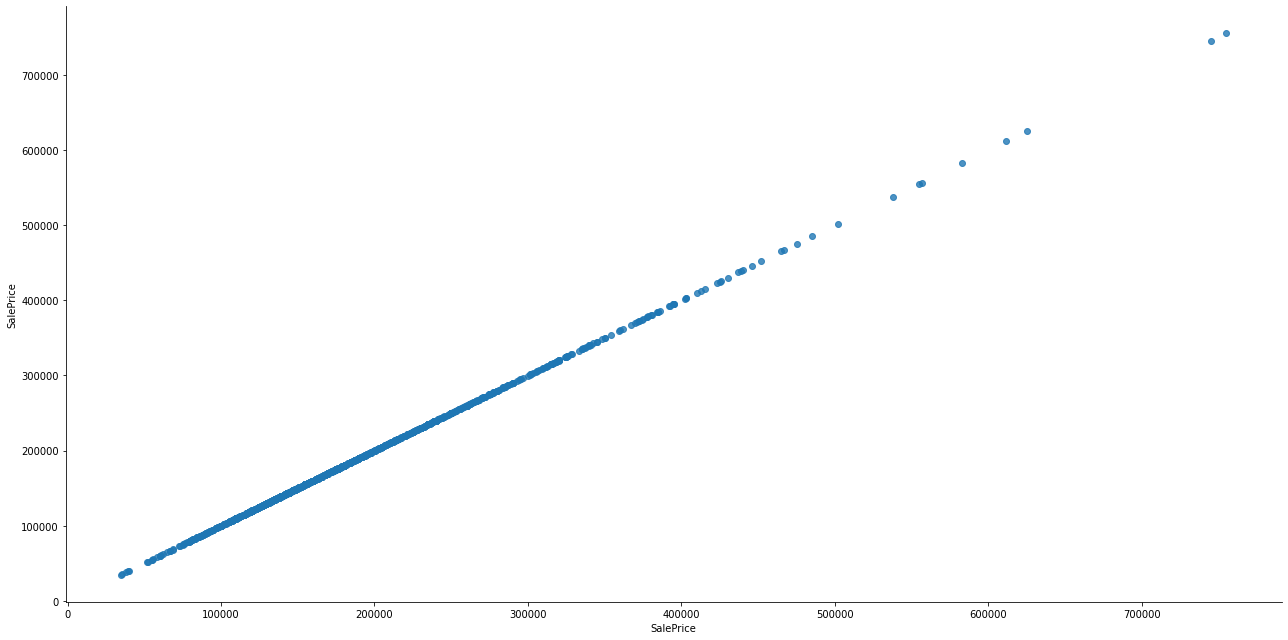

In [43]:
sns.lmplot(x='SalePrice', y='SalePrice', data=data, fit_reg=False, size=9, aspect=2)

# 2. Data preparation

In [44]:


import pandas_profiling as pdp
pdp.ProfileReport(data)



TypeError: ignored

Skalowanie i normalizacja danych

# 3. Inżynieria cech